<center>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/module_1/images/SN_web_lightmode.png" width="300"> 
</center>


<h1>Refine the Baseline Regression Models</h1>

Estimated time needed: **120** minutes


## Lab Overview:

Now you have built a baseline regression model with some relatively good RMSE and R-squared reported values. However, we could still improve it by using methods like adding polynomial and interaction terms, regularization, and so on.

In this lab, you will be asked to continue using `tidymodels` to improve the performance of baseline model:

- **TASK: Add polynomial terms**
- **TASK: Add interactions terms**
- **TASK: Add regularizations terms**
- **TASK: Experiment to search for improved models**


Let's start!


The tidyverse and the tidymodels packages can be used to produce high quality statistical and machine learning models. The Tidyverse library is a useful tool that provides various tools for data visualization, data manipulation, and read various datasets into a data frame; our Jupyter notebook platforms have a built-in Tidymodels, Tidyverse and rlang libraries, so we do not need to install these packages prior to loading library. However, if you decide to run this lab on your RStudio Desktop locally on your machine, you can remove the commented lines of code to install these packages before loading.


In [10]:
# Uncomment to install packages if running locally
install.packages("tidyverse")
install.packages("tidymodels")
install.packages("dplyr")

Installing package into 'C:/Users/nguye/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nguye\AppData\Local\Temp\RtmpK0s8OJ\downloaded_packages


Installing package into 'C:/Users/nguye/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'tidymodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nguye\AppData\Local\Temp\RtmpK0s8OJ\downloaded_packages


Installing package into 'C:/Users/nguye/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\nguye\AppData\Local\R\win-library\4.4\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\nguye\AppData\Local\R\win-library\4.4\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\nguye\AppData\Local\Temp\RtmpK0s8OJ\downloaded_packages


In [1]:
library("tidymodels")
library("tidyverse")
library("stringr")
library("dplyr")

── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.2.1     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔

The processed Seoul bike sharing dataset `seoul_bike_sharing_converted_normalized.csv`,  includes the converted indicator variables, and the numerical variables have been normalized. 
Let's read it as a dataframe first:


In [2]:
# Dataset URL
dataset_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing_converted_normalized.csv"
bike_sharing_df <- read_csv(dataset_url)
spec(bike_sharing_df)

Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  DATE = col_character(),
  RENTED_BIKE_COUNT = col_double(),
  TEMPERATURE = col_double(),
  HUMIDITY = col_double(),
  WIND_SPEED = col_double(),
  VISIBILITY = col_double(),
  DEW_POINT_TEMPERATURE = col_double(),
  SOLAR_RADIATION = col_double(),
  RAINFALL = col_double(),
  SNOWFALL = col_double(),
  FUNCTIONING_DAY = col_character(),
  `0` = col_double(),
  `1` = col_double(),
  `10` = col_double(),
  `11` = col_double(),
  `12` = col_double(),
  `13` = col_double(),
  `14` = col_double(),
  `15` = col_double(),
  `16` = col_double(),
  `17` = col_double(),
  `18` = col_double(),
  `19` = col_double(),
  `2` = col_double(),
  `20` = col_double(),
  `21` = col_double(),
  `22` = col_double(),
  `23` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double(),
  `8` = col_double(),
  `9` = col_double(),
  AUTUMN = col_double(),
  SPRING = col_double(),
  SUMMER = col_double(),
  WINTER = col_double(),
  HOLIDAY 

We won't be using the `DATE` column, because 'as is', it basically acts like an data entry index. (However, given more time, we could use the `DATE` colum to create a 'day of week' or 'isWeekend' column, which we might expect has an affect on preferred bike rental times.) We also do not need the `FUNCTIONAL DAY` column because it only has one distinct value remaining (`YES`) after missing value processing.


In [3]:
bike_sharing_df <- bike_sharing_df %>% 
                   select(-DATE, -FUNCTIONING_DAY)

Define a linear regression model specification.


In [4]:
lm_spec <- linear_reg() %>%
  set_engine("lm") %>% 
  set_mode("regression")

Split the data into training and testing datasets.


In [5]:
set.seed(1234)
data_split <- initial_split(bike_sharing_df, prop = 4/5)
train_data <- training(data_split)
test_data <- testing(data_split)

Now we are ready to refine the previous baseline regression model.


# TASK: Add polynomial terms


Linear regression models are the most suitable models to capture the linear correlations among variables. However, in real world data, many relationships may be non-linear.


For example, the correlation between `RENTED_BIKE_COUNT` and `TEMPERATURE` does not look like linear:


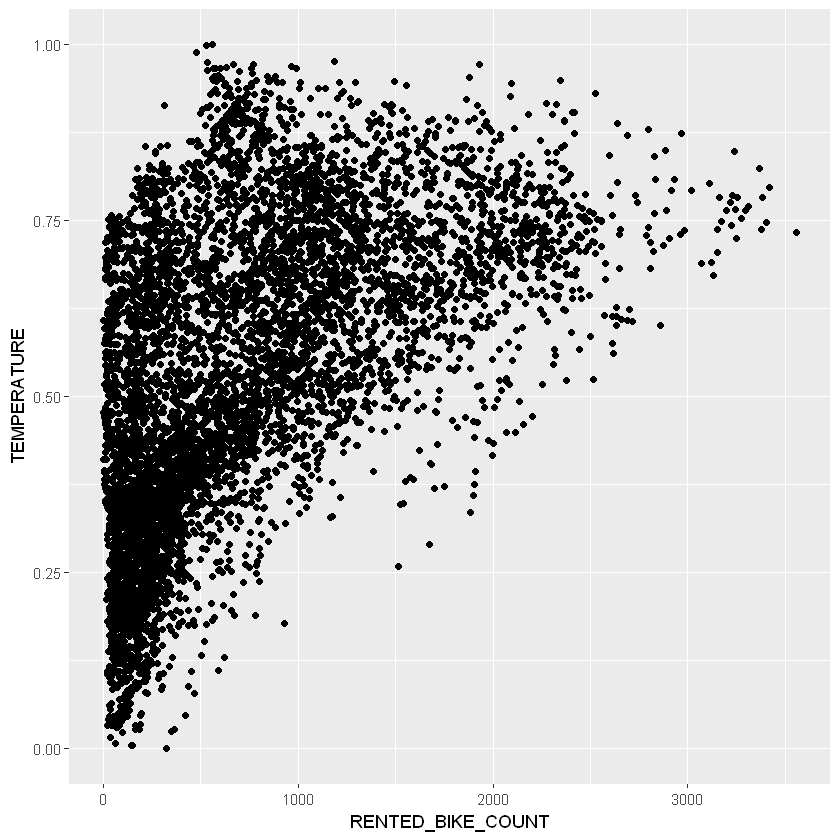

In [6]:
ggplot(data = train_data, aes(RENTED_BIKE_COUNT, TEMPERATURE)) + 
    geom_point() 

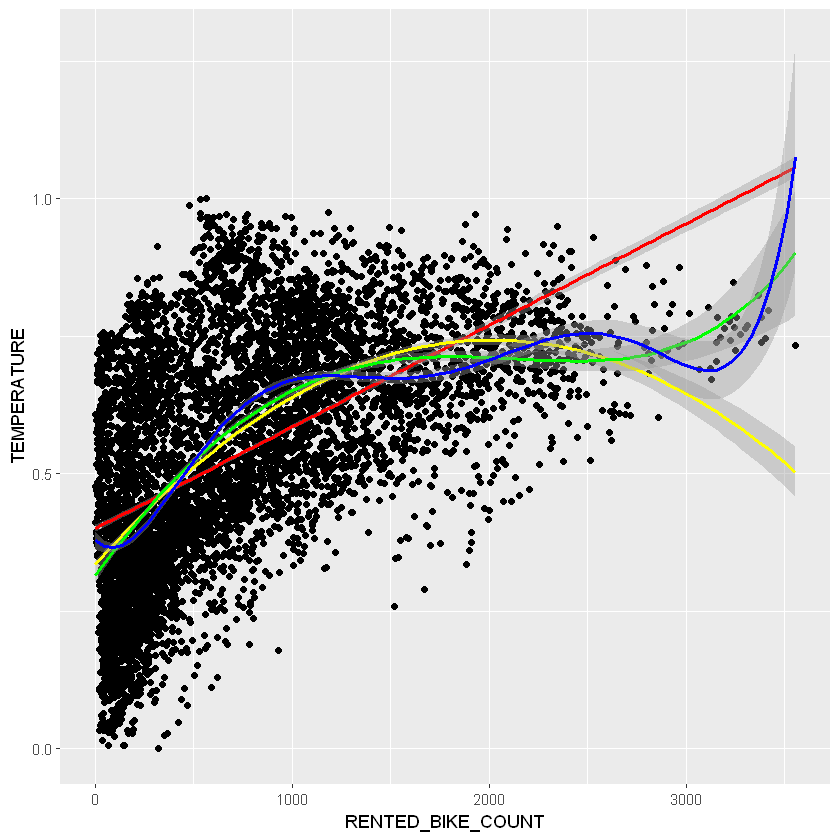

In [8]:
# Plot the higher order polynomial fits
ggplot(data=train_data, aes(RENTED_BIKE_COUNT, TEMPERATURE)) + 
    geom_point() + 
    geom_smooth(method = "lm", formula = y ~ x, color="red") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 2), color="yellow") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 4), color="green") + 
    geom_smooth(method = "lm", formula = y ~ poly(x, 6), color="blue")

OK, let's add some higher order polynomials of important variables to the regression models


_TODO:_ Fit a linear regression model `lm_poly` with higher order polynomial terms on the important variables (larger coefficients) found in the baseline model


In [19]:
# Fit a linear model with higher order polynomial on some important variables 

# #HINT: Use ploy function to build polynomial terms, lm_poly <- RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) + poly(HUMIDITY, 4) .....
lm_poly <- lm_spec %>%
    fit(RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) + poly(HUMIDITY, 4), data = train_data)


In [20]:
# Print model summary

summary(lm_poly$fit)


Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) + 
    poly(HUMIDITY, 4), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1245.78  -274.23   -65.78   196.92  2235.30 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              734.851      5.638 130.342  < 2e-16 ***
poly(TEMPERATURE, 6)1  32253.862    474.024  68.043  < 2e-16 ***
poly(TEMPERATURE, 6)2  -6660.888    483.679 -13.771  < 2e-16 ***
poly(TEMPERATURE, 6)3  -9542.107    466.020 -20.476  < 2e-16 ***
poly(TEMPERATURE, 6)4  -2896.966    465.870  -6.218 5.32e-10 ***
poly(TEMPERATURE, 6)5   -528.619    468.112  -1.129    0.259    
poly(TEMPERATURE, 6)6    718.200    469.460   1.530    0.126    
poly(HUMIDITY, 4)1    -18199.566    486.400 -37.417  < 2e-16 ***
poly(HUMIDITY, 4)2    -10197.773    473.402 -21.541  < 2e-16 ***
poly(HUMIDITY, 4)3      -421.778    470.084  -0.897    0.370    
poly(HUMIDITY, 4)4     -2285.086    469.251  -4.870 1.14e-0

In [21]:
head(lm_poly)

$lvl
NULL

$spec
Linear Regression Model Specification (regression)

Computational engine: lm 

Model fit template:
stats::lm(formula = missing_arg(), data = missing_arg(), weights = missing_arg())

$fit

Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ poly(TEMPERATURE, 6) + 
    poly(HUMIDITY, 4), data = data)

Coefficients:
          (Intercept)  poly(TEMPERATURE, 6)1  poly(TEMPERATURE, 6)2  
                734.9                32253.9                -6660.9  
poly(TEMPERATURE, 6)3  poly(TEMPERATURE, 6)4  poly(TEMPERATURE, 6)5  
              -9542.1                -2897.0                 -528.6  
poly(TEMPERATURE, 6)6     poly(HUMIDITY, 4)1     poly(HUMIDITY, 4)2  
                718.2               -18199.6               -10197.8  
   poly(HUMIDITY, 4)3     poly(HUMIDITY, 4)4  
               -421.8                -2285.1  


$preproc
$preproc$y_var
[1] "RENTED_BIKE_COUNT"


$elapsed
$elapsed$elapsed
[1] NA


$censor_probs
list()


_TODO:_ Make predictions on test dataset using the `lm_poly` models


In [22]:
# Use predict() function to generate test results for `lm_poly`
lm_poly_results <- lm_poly %>%
    predict(new_data = train_data) %>%
    mutate(truth = train_data$RENTED_BIKE_COUNT)

test_results <- lm_poly %>%
    predict(new_data = test_data) %>%
    mutate(truth = test_data$RENTED_BIKE_COUNT)


Another minor improvement we could do here is to convert all negative prediction results to zero, because we can not have negative rented bike counts


In [23]:
# e.g., test_results[test_results<0] <- 0
test_results[test_results<0] <- 0

Now, calculate R-squared and RMSE for the test results generated by `lm_ploy` model


In [24]:
# Calculate R-squared and RMSE from the test results
rmse_poly <- sqrt(mean(lm_poly_results$truth - lm_poly_results$.pred)^2)
rsq_poly <- rsq(lm_poly_results, truth = truth, estimate = .pred)

rmse_poly
rsq_poly

[1] 1.622908e-12

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.4826719


If you include all variables, and additionally include some of the more important ones as higher order poly terms, then you should notice improved  `R-squared` and `RMSE` values.


# TASK: Add interaction terms


In real-world scenarios, in addition to non-linear relationships between response variables and predictor variables, you may also encounter relationships among variables called `interaction effects`.

For example, the effect of predictor variable `TEMPERATURE` on `RENTED_BIKE_COUNT` may also depend on other variables such as `HUMIDITY`, `RAINFALL`, or both (they `interact`) and the effect of `SEASON` on `RENTED_BIKE_COUNT` may also depend on `HOLIDAY`, `HOUR`, or both.

To capture such interaction effects, we could add some interaction terms such as `RAINFALL*HUMIDITY` to the regression model, similar to what we did with polynominal terms. In this task, you will explore and conduct some experiments to search for interaction terms which will improve the model performance.


_TODO:_ Try adding some interaction terms to the previous polynomial models.


In [25]:
# Add interaction terms to the poly regression built in previous step

# HINT: You could use `*` operator to create interaction terms such as HUMIDITY*TEMPERATURE and make the formula look like:
# RENTED_BIKE_COUNT ~ RAINFALL*HUMIDITY ...
lm_interactive <- lm_spec %>%
    fit(RENTED_BIKE_COUNT ~ RAINFALL*HUMIDITY, data = train_data)

    

In [26]:
# Print model summary
summary(lm_interactive)

             Length Class      Mode
lvl           0     -none-     NULL
spec          7     linear_reg list
fit          12     lm         list
preproc       1     -none-     list
elapsed       1     -none-     list
censor_probs  0     -none-     list

In [27]:
# Calculate R-squared and RMSE for the new model to see if performance has improved
#predict the model
lm_interactive_train_results <- lm_interactive %>%
    predict(new_data = train_data) %>%
    mutate(truth = train_data$RENTED_BIKE_COUNT)

lm_interactive_test_results <- lm_interactive %>%
    predict(new_data = test_data) %>%
    mutate(truth = test_data$RENTED_BIKE_COUNT)

# Calculate R-squared and RMSE for the new model
rmse_train_interactive <- sqrt(mean(lm_interactive_train_results$.pred - lm_interactive_train_results$truth)^2)
rsq_train_interactive <- rsq(lm_interactive_train_results, truth = truth, estimate = .pred)

rmse_test_interactive <- sqrt(mean(lm_interactive_test_results$.pred - lm_interactive_train_results$truth)^2)
rsq_test_interactive <- rsq(lm_interactive_test_results, truth = truth, estimate = .pred)
print("R-squared and RMSE of train_data ")
rmse_train_interactive
rsq_train_interactive
print("R-squared and RMSE of test_data ")
rmse_test_interactive
rsq_test_interactive

[1] "R-squared and RMSE of train_data "


[1] 3.855944e-13

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.04984034


[1] "R-squared and RMSE of test_data "


[1] 4.565263

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.0484588


# TASK: Add regularization


In previous tasks, you were asked to add polynominal and interaction terms to the model, aiming to capture nonlinearity and interaction effects between the predictor variables. Hopefully, your updated models have better R-squared and RMSE values.

However, adding these terms makes your model more complicated, more difficult to explain, and more likely to suffer from overfitting. To overcome these issues, one solution is to add regularization terms to your models.


When building the baseline model, we used the basic `lm` engine. In this task, you will use a more advanced and generalized `glmnet` engine. It provides a generalized linear model with Lasso, Ridge, and Elastic Net regularizations.

In general, using `glmnet` can enhance your models in the following ways:
- Address overfitting issues by shrinking the coefficients
- Address predictor variable colinearity by selecting only one variable from each group of colinear variables (by shrinking their coefficients to zero)
- Make your models more interpretable due to simplification (fewer variables in the outcome models)


Now, let's switch our regression engine to `glmnet`


_TODO:_ Define a linear regression model specification `glmnet_spec` using `glmnet` engine


In [11]:
# HINT: Use linear_reg() function with two parameters: penalty and mixture
# - penalty controls the intensity of model regularization
# - mixture controls the tradeoff between L1 and L2 regularizations

# You could manually try different parameter combinations or use grid search to find optimal combinations
ridge_spec <- linear_reg(penalty = 0.1, mixture = 0) %>%
  set_engine("glmnet")

lasso_spec <- linear_reg(penalty = 0.1, mixture = 1) %>%
  set_engine("glmnet")

Fit a glmnet model called  `lm_glmnet` using the `fit()` function. For the formula part, keep the polynominal and interaction terms you used in the previous task.


In [12]:
install.packages('glmnet')


Installing package into 'C:/Users/nguye/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nguye\AppData\Local\Temp\Rtmpor2veK\downloaded_packages


In [13]:
library('glmnet')

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8



In [14]:
# Fit a glmnet model using the fit() function

#Create a recipe
bike_recipe <- recipe(RENTED_BIKE_COUNT ~., data = train_data)

#Create a work flow
ridge_wf <- workflow() %>% add_recipe(bike_recipe)

#Add the ridge model and fit the model
ridge_fit <- ridge_wf %>%
    add_model(ridge_spec) %>%
    fit(data = train_data) 

#view the fit model result
ridge_fit %>%
    pull_workflow_fit() %>%
    tidy()

Warning message:
"`pull_workflow_fit()` was deprecated in workflows 0.2.3.
ℹ Please use `extract_fit_parsnip()` instead."


term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),342.31488,0.1
TEMPERATURE,831.84024,0.1
HUMIDITY,-721.91395,0.1
WIND_SPEED,24.75312,0.1
VISIBILITY,50.42041,0.1
DEW_POINT_TEMPERATURE,416.03003,0.1
SOLAR_RADIATION,241.21443,0.1
RAINFALL,-2068.21240,0.1
SNOWFALL,129.48708,0.1


In [16]:
lasso_wf <- workflow() %>%
    add_recipe(bike_recipe)

lasso_fit <- lasso_wf %>%
    add_model(lasso_spec) %>%
    fit(data = train_data)

lasso_fit %>%
    pull_workflow_fit %>%
    tidy()

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),3.159535e+02,0.1
TEMPERATURE,9.633059e+02,0.1
HUMIDITY,-8.108643e+02,0.1
WIND_SPEED,1.239414e+01,0.1
VISIBILITY,1.928153e+01,0.1
DEW_POINT_TEMPERATURE,4.202592e+02,0.1
SOLAR_RADIATION,2.555924e+02,0.1
RAINFALL,-2.104523e+03,0.1
SNOWFALL,2.152158e+02,0.1


In [ ]:
elasticnet_spec <- linear_reg(penalty = 0.1, mixture = 0.3) %>%
  set_engine("glmnet")

elasticnet_wf <- workflow() %>%
  add_recipe(bike_recipe)
  
elasticnet_fit <- elasticnet_wf %>%
  add_model(elasticnet_spec) %>%
  fit(data = train_data)
  
elasticnet_fit %>%
  pull_workflow_fit() %>%
  tidy()

In [ ]:
# Report rsq and rmse of the `lm_glmnet` model

model <- c('lm_poly','lm_interactive')
rsq <- c(rsq_poly, rsq_train_interactive )
rmse <- c(rmse_poly, rmse_train_interactive)
traindata_cm <- data.frame(model, rsq, rmse)
traindata_cm

# TASK: Experiment to search for improved models


Now you understand some of the methods that you can use to try to improve your models.


_TODO:_ Experiment by building and testing at least five different models. For each of your experiments, include polynomial terms, interaction terms, and one of the three regularizations we introduced.


In [17]:
#grid search for ridge model
#set up model
tune_spec <- linear_reg(
    penalty = tune(),
    mixture = 0) %>% set_engine("glmnet")

#Create workflow
ridge_wf <- workflow() %>% add_recipe(bike_recipe)

#Define cross validation
bike_cvfolds <- vfold_cv(train_data)

#Set up grid
lambda_grid <- grid_regular(levels = 50,
    penalty(range = c(-3,0.3)))

#Tune the grid
train_fit1 <- tune_grid(
    lasso_wf %>% add_model(tune_spec),
    resamples = bike_cvfolds,
    grid = lambda_grid)

test_fit1 <- tune_grid(
    lasso_wf %>% add_model(tune_spec),
    resamples = bike_cvfolds,
    grid = lambda_grid)

results_grid <- show_best(train_fit1, metric = "rmse")
rmse_train1 <- results_grid[1,4]
rmse_train1

results_grid <- show_best(train_fit1, metric = "rsq")
rsq_train1 <- results_grid[1,4]

rsq_train1


mean
<dbl>
378.6325


mean
<dbl>
0.6557688


In [18]:
#grid search for lasso model
#set up model
tune_spec <- linear_reg(
    penalty = tune(),
    mixture = 1) %>% set_engine("glmnet")

#Create workflow
lasso_wf <- workflow() %>% add_recipe(bike_recipe)

#Define cross validation
bike_cvfolds <- vfold_cv(train_data)

#Set up grid
lambda_grid <- grid_regular(levels = 50,
    penalty(range = c(-3,0.3)))

#Tune the grid
train_fit2 <- tune_grid(
    lasso_wf %>% add_model(tune_spec),
    resamples = bike_cvfolds,
    grid = lambda_grid)

result_grid <- show_best(train_fit2, metric = "rmse")
rmse_train2 <- result_grid[1,4]
rmse_train2

result_grid <- show_best(train_fit2, metric = "rsq")
rsq_train2 <- result_grid[1,4]
rsq_train2  

mean
<dbl>
378.3011


mean
<dbl>
0.6554689


In [19]:
#grid search for elastic net
#create model
tune_spec <- linear_reg(
    penalty = tune(),
    mixture = 0.3) %>% set_engine("glmnet")

#Create workflow
elastic_wf = workflow() %>% add_recipe(bike_recipe)

#Define the cross validation
bike_cvfolds <- vfold_cv(train_data)

#Set up grid
lambda_grid <- grid_regular(levels = 50,
    penalty(range = c(-3, 0.3)))

#Tune the grid
train_fit5 <- tune_grid(
    elastic_wf %>% add_model(tune_spec),
    resamples = bike_cvfolds,
    grid = lambda_grid)

#RMSE, RSQ
result_grid <- show_best(train_fit5, metric = 'rmse')
rmse_train5 = result_grid[1,4]
rmse_train5

result_grid <- show_best(train_fit5, metric = 'rsq')
rsq_train5 = result_grid[1,4]
rsq_train5


mean
<dbl>
377.9417


mean
<dbl>
0.6564592


In [20]:
#polynomial model
train_fit3 <- lm_spec %>%
    fit(RENTED_BIKE_COUNT ~ poly(TEMPERATURE,2)+poly(RAINFALL,2)+poly(SNOWFALL,2),
        data = train_data)

train_results3 <- train_fit3 %>%
    predict(new_data = train_data) %>%
    mutate(truth = train_data$RENTED_BIKE_COUNT)

test_results3 <- train_fit3 %>%
    predict(new_data = test_data) %>%
    mutate(truth = test_data$RENTED_BIKE_COUNT)

rmse_train3 <- sqrt(mean(train_results3$.pred - train_results3$truth)^2)
rsq_train3 <- rsq(train_results3, truth = truth, estimate = .pred)
rmse_train3
rsq_train3

rmse_test3 <- sqrt(mean(test_results3$.pred - test_results3$truth)^2)
rsq_test3 <- rsq(test_results3, truth = truth, estimate = .pred)
rmse_test3
rsq_test3


[1] 1.077513e-12

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.3575389


[1] 15.02082

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.3568909


In [21]:
#multi-reg model
train_fit4 <- lm_spec %>%
    fit(RENTED_BIKE_COUNT ~ TEMPERATURE+RAINFALL+SNOWFALL,
        data = train_data)

train_results4 <- train_fit4 %>%
    predict(new_data = train_data) %>%
    mutate(truth = train_data$RENTED_BIKE_COUNT)

test_results4 <- train_fit4 %>%
    predict(new_data = test_data) %>%
    mutate(truth = test_data$RENTED_BIKE_COUNT)

rmse_train4 <- sqrt(mean(train_results4$.pred - train_results4$truth)^2)
rsq_train4 <- rsq(train_results4, truth = truth, estimate = .pred)
rmse_train4
rsq_train4

rmse_test4 <- sqrt(mean(test_results4$.pred - test_results4$truth)^2)
rsq_test4 <- rsq(test_results4, truth = truth, estimate = .pred)
rmse_test4
rsq_test4


[1] 2.111287e-12

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.3411486


[1] 16.9928

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.3471276


In [24]:
#multi-reg model
train_fit6 <- lm_spec %>%
    fit(RENTED_BIKE_COUNT ~ TEMPERATURE+RAINFALL+SNOWFALL+WIND_SPEED,
        data = train_data)

train_results6 <- train_fit6 %>%
    predict(new_data = train_data) %>%
    mutate(truth = train_data$RENTED_BIKE_COUNT)

test_results6 <- train_fit6 %>%
    predict(new_data = test_data) %>%
    mutate(truth = test_data$RENTED_BIKE_COUNT)

train_fit6_coefs <- tidy(train_fit6)
train_fit6_coefs
rmse_train6 <- sqrt(mean(train_results6$.pred - train_results6$truth)^2)
rsq_train6 <- rsq(train_results6, truth = truth, estimate = .pred)
rmse_train6
rsq_train6

rmse_test6 <- sqrt(mean(test_results6$.pred - test_results6$truth)^2)
rsq_test6 <- rsq(test_results6, truth = truth, estimate = .pred)
rmse_test6
rsq_test6


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-325.6222,20.96528,-15.531496,1.764864e-53
TEMPERATURE,1731.0916,30.42383,56.899190,0.000000e+00
RAINFALL,-2921.1333,185.37232,-15.758196,5.677424e-55
SNOWFALL,-355.1660,131.90767,-2.692535,7.108567e-03
WIND_SPEED,632.5302,44.96767,14.066334,2.563617e-44


[1] 1.057082e-12

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.3598656


[1] 11.99127

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.3743496


In [ ]:
# Report the best performed model in terms of rmse and rsq


Here are the performance requirements for your best model:
- The RMSE should be less than 330 (rougly 10% of the max value in test dataset)
- R-squared should be greater than 0.72


_TODO:_ Visualize the saved RMSE and R-squared values using a grouped barchart


# A tibble: 12 × 3
   model       metric    value
   <chr>       <chr>     <dbl>
 1 reg_ridge   rsq    6.56e- 1
 2 reg_ridge   rmse   3.79e+ 2
 3 reg_lasso   rsq    6.55e- 1
 4 reg_lasso   rmse   3.78e+ 2
 5 reg_elastic rsq    6.56e- 1
 6 reg_elastic rmse   3.78e+ 2
 7 poly        rsq    3.58e- 1
 8 poly        rmse   1.08e-12
 9 multi_lm1   rsq    3.41e- 1
10 multi_lm1   rmse   2.11e-12
11 multi_lm2   rsq    3.60e- 1
12 multi_lm2   rmse   1.06e-12


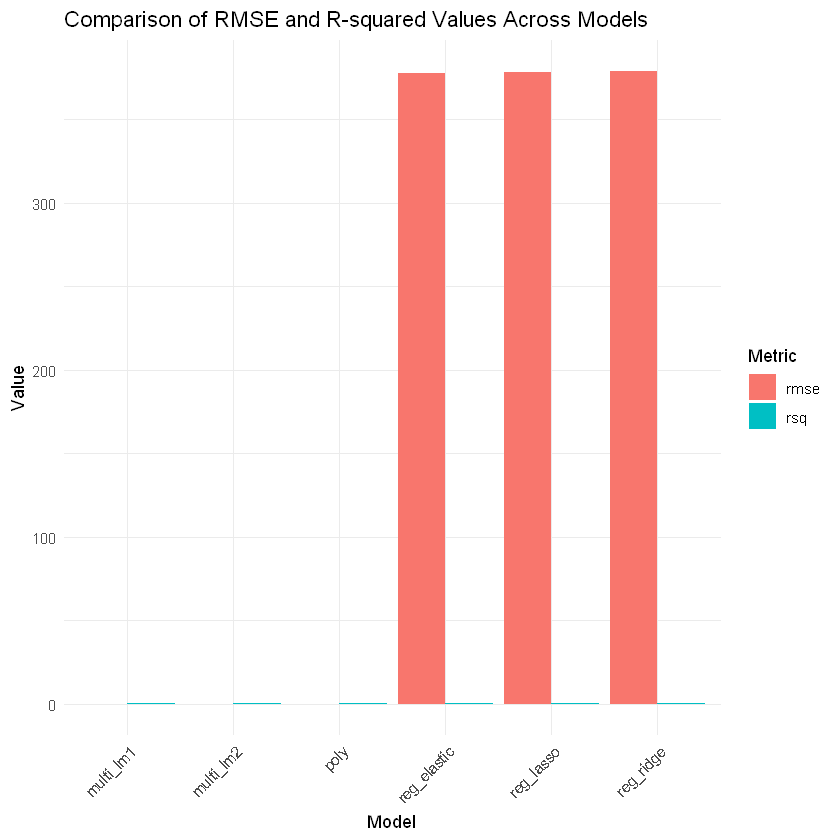

In [23]:
# HINT: Use ggplot() + geom_bar()
model <- c ("reg_ridge", "reg_lasso", "reg_elastic","poly","multi_lm1","multi_lm2")
rsq <- c(rsq_train1$mean, rsq_train2$mean, rsq_train5$mean, rsq_train3$.estimate, rsq_train4$.estimate,rsq_train6$.estimate)
rmse <- c(rmse_train1$mean, rmse_train2$mean, rmse_train5$mean, rmse_train3, rmse_train4, rmse_train6)
traindata_cm <- data.frame(model, rsq, rmse)
# Reshape data to long format
traindata_cm_long <- traindata_cm %>%
    pivot_longer(cols = c(rsq, rmse), names_to = "metric", values_to = "value")

# Print the reshaped data
print(traindata_cm_long)

# Plot the grouped bar chart
ggplot(traindata_cm_long, aes(x = model, y = value, fill = metric)) + 
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Model", y = "Value", fill = "Metric", title = "Comparison of RMSE and R-squared Values Across Models") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))



_TODO:_ Create a Q-Q plot by plotting the distribution difference between the predictions generated by your best model and the true values on the test dataset.


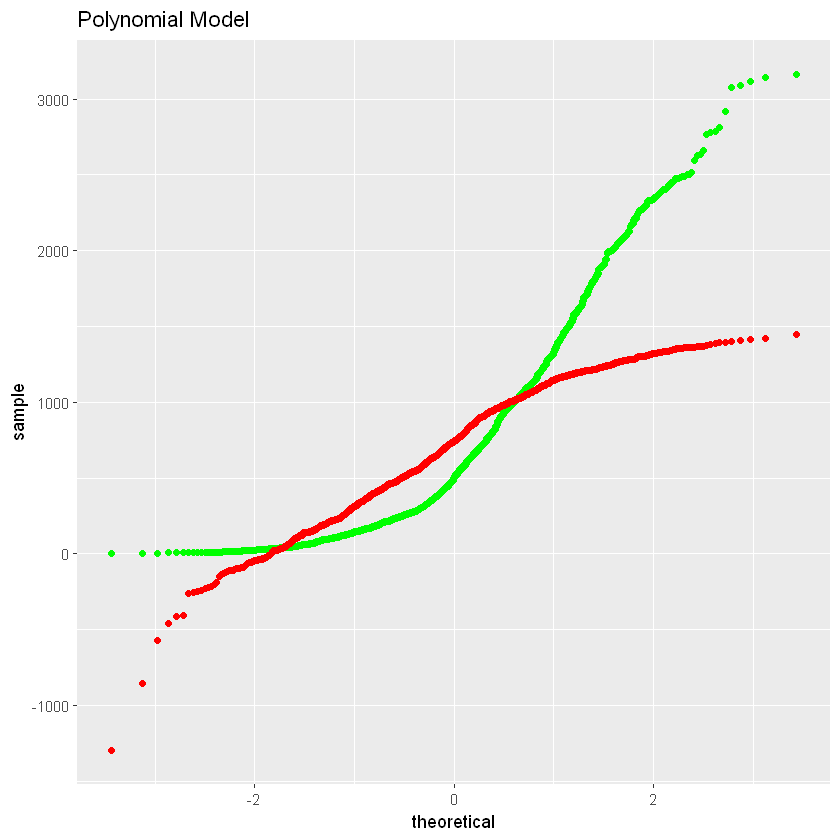

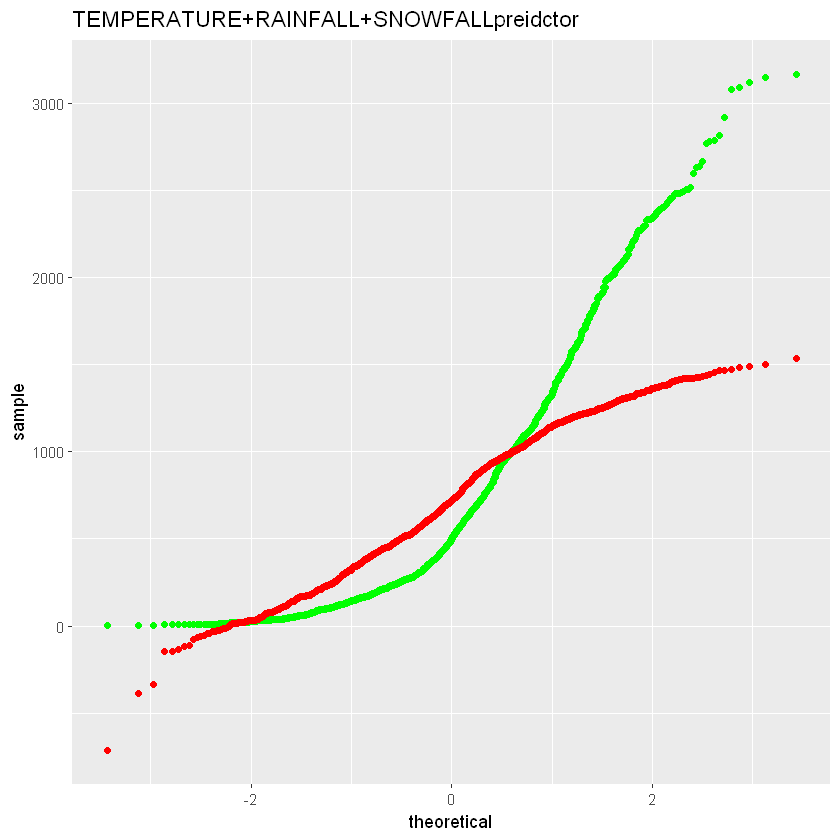

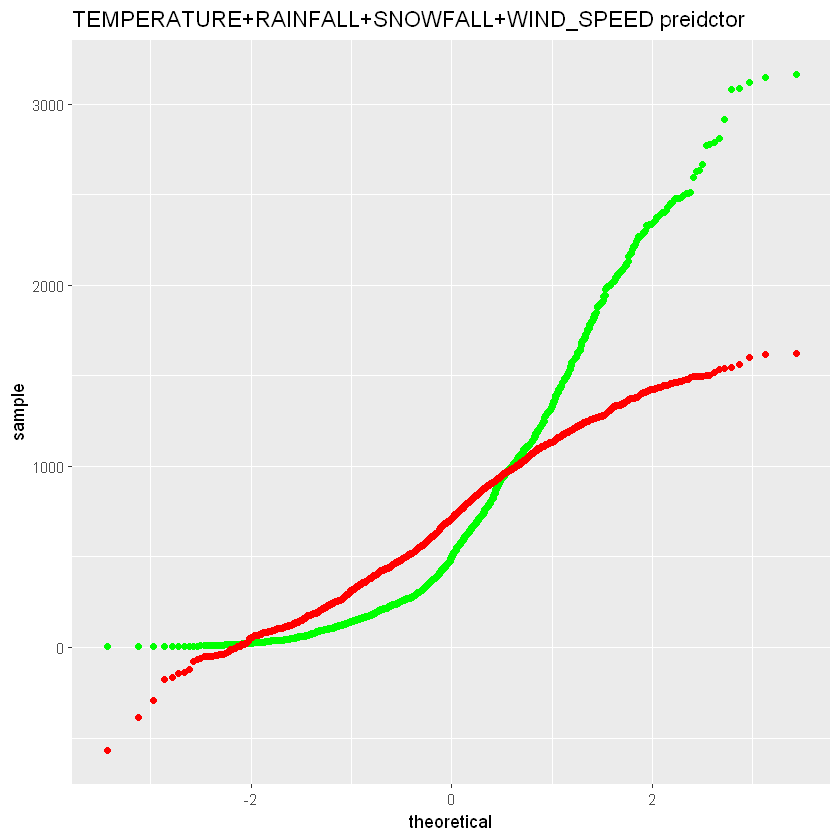

In [78]:
# HINT: Use ggplot() +
    # stat_qq(aes(sample=truth), color='green') +
    # stat_qq(aes(sample=prediction), color='red')

#Polynomial Model
ggplot(test_results3)+
    stat_qq(aes(sample = truth), color = 'green')+
    stat_qq(aes(sample = .pred), color = 'red') + 
    labs(title = "Polynomial Model")


#Multi-linear Model
ggplot(test_results4)+
    stat_qq(aes(sample = truth), color = 'green')+
    stat_qq(aes(sample = .pred), color = 'red')+
    labs(title= "TEMPERATURE+RAINFALL+SNOWFALLpreidctor")

#Multi-linear Model
ggplot(test_results6)+
    stat_qq(aes(sample = truth), color = 'green')+
    stat_qq(aes(sample = .pred), color = 'red')+
    labs(title= "TEMPERATURE+RAINFALL+SNOWFALL+WIND_SPEED preidctor")



One example of such Q-Q plot may look like this:


<a href="https://cognitiveclass.ai/">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/module_4/images/example_qq_plot.png" width="600" align="center">
</a>


# More model improvment methods beyond this course


In addition to the methods mentioned in this lab and previous data analysis courses, you could also explore to try the following methods yourself to see if they could improve model performance:
 - Remove potential redundant variables. If two variables have extremly high correlated, it is possible that they are redundant and could be removed from the model to improve the performance.
 - Remove some outliers. Linear regression models are very sensitive to outliers, you could try to remove some outliers to see if it would improve performance
 - Apply logarithm transformation. In case variable distributions are not normal distribution such as log-normal distribution, you could apply logaritm transformation on the variable to make them more look like normal distribution. In addition, logarithm transformation helps capture the non-linear relationships.
 
If you have time, you could research and try more methods by searching related research papers/articles, discussion forums, etc. If you know how to use other machine learning models with `Tidymodels` such as Neural Networks, Tree models, or Boosting models, you can also try and compare them with the linear regression models.


# Next Steps:


Great! You have improved your baseline model using polynomial terms, interaction terms, and regularizations, and have found your best model.

Now it's time to build an interactive dashboard to provide more interactive user-interactions.


## Authors

<a href="https://www.linkedin.com/in/yan-luo-96288783/" target="_blank">Yan Luo</a>


### Other Contributors

Jeff Grossman


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description           |
| ----------------- | ------- | ---------- | ---------------------------- |
| 2021-04-08        | 1.0     | Yan        | Initial version created      |
|                   |         |            |                              |
|                   |         |            |                              |

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
